<a href="https://colab.research.google.com/github/Jonchyk/Vis/blob/main/PS1_vis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Colab is an online place (cloud) for running Python notebooks--we will use it to run our vis :)

You can just edit and adjust and and run the notebook I gave you [this file!]: don't forget to first save it!!!: File-Save a copy in GitHub

And after adjusting to run with your own data, you can submit it as ps :)

After making edits, while can diff on GitHub, its clunky, better here: File-Revision History

(a sidenote: File-Download it and convert to pdf: https://2pdf.com/convert-ipynb-to-pdf)

make webbrowser fullscreen and collapse upper menu (arrow on the right), especially on laptop

In [1]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now:
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl

from google.colab import files

#import webbrowser

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections])

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib
#%matplotlib --list
#interactive plots:
#%matplotlib notebook
#static images of your plot:
%matplotlib inline
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg
##https://www.marktechpost.com/2023/10/20/6-magic-commands-for-jupyter-notebooks-in-python-data-science/
#%%latex
#%ai
#%run
#%writefile
#%history -n

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;)
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

#sometimes have to install library which you get from https://pypi.org/
#!pip install geopandas

# SETUP


note:  pandas is kind of like stata, or more like r, but not really like
the rest of Py, and helps a lot with traditional data

REFS:

https://www.youtube.com/watch?v=5rNu16O3YNE&t=3676s

https://www.danielmsullivan.com/pages/tutorial_stata_to_python.html

https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_stata.html and on the left there's also r, sas, spreadsheet

https://aeturrell.github.io/coding-for-economists/coming-from-stata.html

https://towardsdatascience.com/going-from-stata-to-pandas-706888525acf

http://statapython.blogspot.com/

http://www.dataschool.io/best-python-pandas-resources/

https://www.dataquest.io/blog/pandas-python-tutorial/

many great tutorials for self study:
https://pandas.pydata.org/pandas-docs/stable/tutorials.html

tutorials in notebooks (just click on folder and may just go straight to one with solutions
and run them in Python):

https://github.com/guipsamora/pandas_exercises/tree/master/01_Getting_%26_Knowing_Your_Data

https://github.com/guipsamora/pandas_exercises/tree/master/06_Stats  

https://github.com/guipsamora/pandas_exercises/tree/master/07_Visualization

for afficionados: https://jakevdp.github.io/PythonDataScienceHandbook/
eg it shows how pandas builds on numpy and whats under the hood


#PS1                                         
Description:
The first Merge will be taking per capita income converted to USD and the population growth in Kyrgyzstan by Region.
This will be interesting as we can compare how income has grown in line with population. The population data is from the UN global data lab, while the per capita income is from the Kyrgyz Bureau of Statistics.

I've renamed regions for the sake of the merge.

I'll create a few new columns; namely, seeing what the "GDP" per region is by multiplying the population per region by per capita income.

I'll then create a classification of "high, mid, low" GDP by region for comparison purposes.

I've already got a few interesting scatterplots to compare - so will interpret those.


##Merge 1 - Per Capita Income in USD and Population - Subnational Level


In [21]:
#download file from online and save in colab as pop.csv;
!wget -q -O pop1.csv https://docs.google.com/spreadsheets/d/1KhpzQlgZqSFgO1Y-axXpSwrsVn9keIhAUITR_m_YIDw/export?format=csv
#download the income file as well.
!wget -q -O income.csv https://docs.google.com/spreadsheets/d/1IQ6YXPmOTZReA-DLWcKqbzkxAsplvrZM9ggXKITnhO4/export?format=csv

In [22]:
# basic navigation
#wd =  'ex1'  #'C:\Users\ref\Desktop\junk' # may need to ADJUST
#os.makedirs(wd)
#os.getcwd() #pwd
!pwd
#os.listdir() #compare to clicking on the left the folder icon #dir
!ls
#os.chdir(wd)
#os.getcwd()

/content
income.csv  pop1.csv  pop_incomepercapita.csv  sample_data


In [4]:
#read in my files
pop = pd.read_csv('pop1.csv')
pop
income = pd.read_csv('income.csv')
income

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,CAGR
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,5.72,5.84,5.96,6.08,6.20,6.32,6.44,6.57,6.69,1.52
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.48,0.47,0.47,0.46,0.46,0.46,0.45,0.45,0.38
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,0.78,0.75,0.86,0.97,1.08,1.19,1.31,1.42,1.53,3.53
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,1.01,1.04,1.03,1.01,0.99,0.98,0.96,0.95,0.93,0.84
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.47,0.44,0.45,0.47,0.48,0.50,0.51,0.53,0.54,1.41
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.07,1.15,1.13,1.10,1.07,1.05,1.02,0.99,0.96,0.12
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.27,0.28,0.28,0.29,0.29,0.30,0.30,0.31,0.31,1.20
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.39,1.41,1.45,1.49,1.53,1.57,1.62,1.66,1.70,1.33
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.29,0.30,0.29,0.29,0.28,0.28,0.27,0.27,0.26,1.19


,Region,2019,2020,2021,2022,2023
0,Kyrgyz Republic,65.01,64.33,76.02,90.89,111.10
1,Batken oblast,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abat oblast,60.53,61.92,76.30,94.38,118.10
3,Yssyk-Kul oblast,65.40,73.57,82.03,104.23,115.56
4,Naryn oblast,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas oblast,55.28,60.18,65.55,79.89,96.13
7,Chui oblast,69.94,66.03,77.25,91.20,106.32
8,Bishkek city,72.51,68.76,79.43,97.02,123.12
9,Osh city,55.94,54.55,63.16,67.69,86.69


In [5]:
#rename names so we can merge - replace method.
income['Region'] = income['Region'].replace({
    'Kyrgyz Republic': 'Total',
    'Batken oblast': 'Batken',
    'Jalal-Abat oblast': 'Jalal-Abad',
    'Yssyk-Kul oblast': 'Issyk-Kul',
    'Naryn oblast': 'Naryn',
    'Osh city': 'Osh',
    'Talas oblast': 'Talas',
    'Chui oblast': 'Chuy',
    'Bishkek city': 'Bishkek'
})
income
#not great that  osh and osh city are here. can't merge those, though perhaps we could play with pop data to backtest a merged amount.
#for now let's drop osh oblast and focus on the city since this is just for ease of use.
income.drop(index=5, inplace=True)
income


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
5,Osh oblast (until 2013 y. including Osh city),67.63,65.19,79.16,89.52,108.78
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


,Region,2019,2020,2021,2022,2023
0,Total,65.01,64.33,76.02,90.89,111.10
1,Batken,61.14,61.60,70.96,86.13,112.95
2,Jalal-Abad,60.53,61.92,76.30,94.38,118.10
3,Issyk-Kul,65.40,73.57,82.03,104.23,115.56
4,Naryn,53.33,52.47,66.42,81.15,94.80
6,Talas,55.28,60.18,65.55,79.89,96.13
7,Chuy,69.94,66.03,77.25,91.20,106.32
8,Bishkek,72.51,68.76,79.43,97.02,123.12
9,Osh,55.94,54.55,63.16,67.69,86.69


In [6]:
#can i try merging now?
merged_df = pd.merge(pop, income, on='Region', how='inner')

#ok! this is cool. I think i need to clean up the columns since now i have 2019_x, and y. that's a good lesson for next time to do it prior to merging. beginner's mistake.
merged_df.rename(columns={'2019_x':'2019','2020_x':'2020','2021_x':'2021','2019_y': '2019 income', '2020_y': '2020 income', '2021_y': '2021 income', '2022':'2022 income', '2023':'2023 income'}, inplace=True)
merged_df

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [7]:
merged_df.columns #list var names

Index(['Region', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', 'CAGR', '2019 income', '2020 income',
       '2021 income', '2022 income', '2023 income'],
      dtype='object')

In [8]:
merged_df.head(2)
merged_df.tail(2)

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95


,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [9]:
merged_df #get spreadsheet view: can sort on cols, filter, and copy

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2018,2019,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.32,6.44,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.46,0.46,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.19,1.31,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.98,0.96,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.50,0.51,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,1.05,1.02,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.30,0.30,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.57,1.62,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.28,0.27,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13


In [29]:
merged_df['2019 income'] = pd.to_numeric(merged_df['2019 income'], errors='coerce')
merged_df['2019 income'] = pd.to_numeric(merged_df['2019 income'], errors='coerce')

merged_df['2019_natinc'] = (merged_df['2019'] * merged_df['2019 income'])

merged_df['2019_natinc'] = (merged_df['2019_natinc'] * 1000000) #since population is in millions, we need to adjust this.




So, using two seperate data sources we've calculated what could be the national income in 2019.

In [30]:
merged_df

,Region,2003,2004,2005,2006,2007,2008,2009,2010,2011,...,2020,2021,CAGR,2019 income,2020 income,2021 income,2022 income,2023 income,2019_GDP,2019_natinc
0,Total,5.04,5.10,5.16,5.22,5.28,5.35,5.41,5.48,5.54,...,6.57,6.69,1.52,65.01,64.33,76.02,90.89,111.10,418664400.0,418664400.0
1,Batken,0.42,0.42,0.42,0.42,0.42,0.42,0.43,0.43,0.43,...,0.45,0.45,0.38,61.14,61.60,70.96,86.13,112.95,28124400.0,28124400.0
2,Bishkek,0.78,0.82,0.86,0.90,0.88,0.87,0.85,0.84,0.83,...,1.42,1.53,3.53,72.51,68.76,79.43,97.02,123.12,94988100.0,94988100.0
3,Chuy,0.80,0.80,0.80,0.80,0.83,0.86,0.89,0.91,0.94,...,0.95,0.93,0.84,69.94,66.03,77.25,91.20,106.32,67142400.0,67142400.0
4,Issyk-Kul,0.42,0.42,0.41,0.41,0.42,0.44,0.45,0.47,0.48,...,0.53,0.54,1.41,65.40,73.57,82.03,104.23,115.56,33354000.0,33354000.0
5,Jalal-Abad,0.93,0.94,0.96,0.97,0.97,0.98,0.98,0.98,0.98,...,0.99,0.96,0.12,60.53,61.92,76.30,94.38,118.10,61740600.0,61740600.0
6,Naryn,0.25,0.25,0.25,0.24,0.25,0.25,0.25,0.25,0.26,...,0.31,0.31,1.20,53.33,52.47,66.42,81.15,94.80,15999000.0,15999000.0
7,Osh,1.37,1.34,1.30,1.27,1.29,1.30,1.32,1.34,1.35,...,1.66,1.70,1.33,55.94,54.55,63.16,67.69,86.69,90622800.0,90622800.0
8,Talas,0.21,0.21,0.21,0.21,0.22,0.23,0.25,0.26,0.27,...,0.27,0.26,1.19,55.28,60.18,65.55,79.89,96.13,14925600.0,14925600.0


In [11]:
#let's look at the region, start year, end year, and the CAGR i calculated in datamanagement.

merged_df[["Region","2003", "2021", "CAGR"]][0:9]

,Region,2003,2021,CAGR
0,Total,5.04,6.69,1.52
1,Batken,0.42,0.45,0.38
2,Bishkek,0.78,1.53,3.53
3,Chuy,0.80,0.93,0.84
4,Issyk-Kul,0.42,0.54,1.41
5,Jalal-Abad,0.93,0.96,0.12
6,Naryn,0.25,0.31,1.20
7,Osh,1.37,1.70,1.33
8,Talas,0.21,0.26,1.19


In [12]:
merged_df["2019 income"].mean() # median, mode, stdev

62.120000000000005

In [13]:
merged_df["2019 income"].value_counts(dropna=False) #.nlargest(3) a tab or freq table. This doesn't work well with my current data

,count
2019 income,
65.01,1
61.14,1
72.51,1
69.94,1
65.40,1
60.53,1
53.33,1
55.94,1
55.28,1


<Axes: >

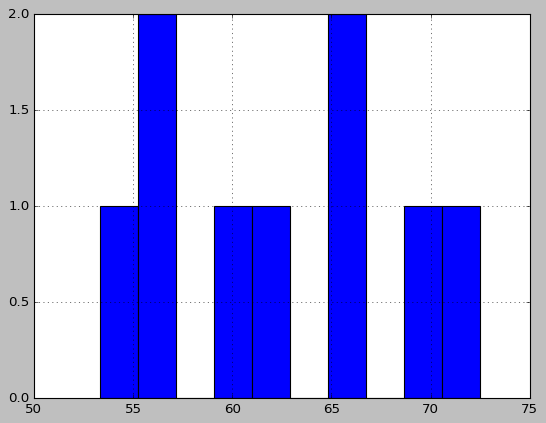

In [14]:
merged_df["2019 income"].hist() #done, but not sure this is great

<Axes: xlabel='Region', ylabel='[2019 income]'>

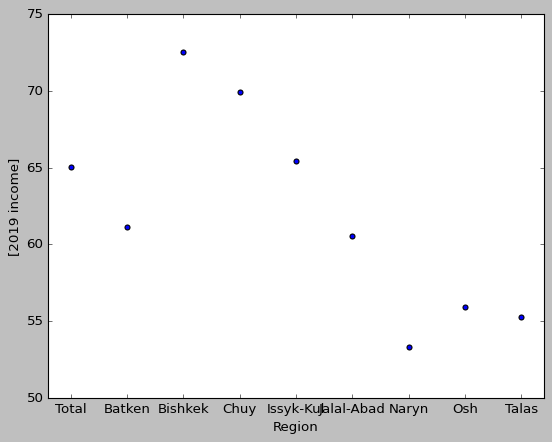

In [15]:
merged_df.plot(kind='scatter', y=['2019 income'], x='Region') #This is what sparked me going back and merging the two files; region vs incomes isn't interesting. Population vs income is!

Text(6.44, 65.01, 'Total')

Text(0.46, 61.14, 'Batken')

Text(1.31, 72.51, 'Bishkek')

Text(0.96, 69.94, 'Chuy')

Text(0.51, 65.4, 'Issyk-Kul')

Text(1.02, 60.53, 'Jalal-Abad')

Text(0.3, 53.33, 'Naryn')

Text(1.62, 55.94, 'Osh')

Text(0.27, 55.28, 'Talas')

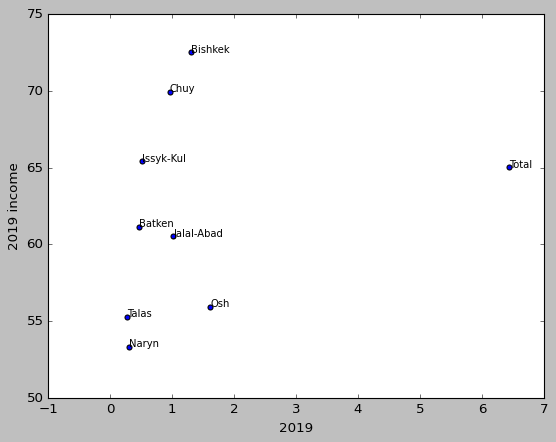

In [16]:
#So apparently, if I want to create a scatterplot with labels, need to use the following code and "ax"...Will learn more to see if there's a differnet way to do it.
ax = merged_df.plot(kind='scatter', x='2019', y='2019 income')
# Add region labels to the plot using the following:
for i, row in merged_df.iterrows():
    ax.text(row['2019'], row['2019 income'], row['Region'], fontsize=9)

Text(6.57, 64.33, 'Total')

Text(0.45, 61.6, 'Batken')

Text(1.42, 68.76, 'Bishkek')

Text(0.95, 66.03, 'Chuy')

Text(0.53, 73.57, 'Issyk-Kul')

Text(0.99, 61.92, 'Jalal-Abad')

Text(0.31, 52.47, 'Naryn')

Text(1.66, 54.55, 'Osh')

Text(0.27, 60.18, 'Talas')

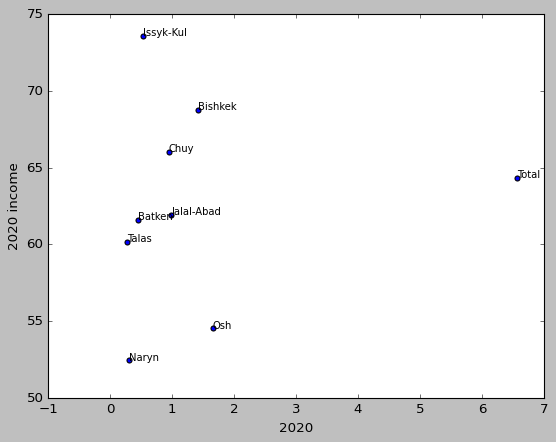

In [17]:
# doing this for 2020 now.
ax = merged_df.plot(kind='scatter', x='2020', y='2020 income')
# Add region labels to the plot
for i, row in merged_df.iterrows():
    ax.text(row['2020'], row['2020 income'], row['Region'], fontsize=9)
#interesting to note Issyk-Kul jumped way up!

In [18]:
#finalstep, let's get that csv file i merged all downloaded!
from google.colab import files
#convert dataframe to csv
merged_df.to_csv('pop_incomepercapita.csv', index=False)

# Download the file.
files.download('pop_incomepercapita.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Merge 2 - EGRA Data and Disaster Incidence
Will load the EGRA dataset and the Disaster Incidence Data from Inform here.

For the EGRA data, will aggregrate scores by region, after renaming region. Will drop most variables, but will keep the reading comp scores and numeracy scores.

Will clean, rename/replace region, and merge on region



